# Multithreading

In [2]:
import threading

import time

def disp(thread_name):
    for i in range(5):
        #time.sleep(1)
        print(f"{thread_name} - {i}")

# Creating threads
thread1 = threading.Thread(target=disp, args=("First_Thread",))
thread2 = threading.Thread(target=disp, args=("Second_Thread",))

# Starting threads
thread1.start()
thread2.start()

# Wait for both threads to finish
#thread1.join()
#thread2.join()

print("All threads finished.")

First_Thread - 0
First_Thread - 1
First_Thread - 2
First_Thread - 3
First_Thread - 4
Second_Thread - 0
Second_Thread - 1
Second_Thread - 2
Second_Thread - 3
Second_Thread - 4
All threads finished.


In [14]:
import threading
import time

def disp(thread_name):
    for i in range(5):
        #time.sleep(1)
        current_thread = threading.current_thread()
        print(f"Thread Name: {current_thread.name}")
        print(f"{thread_name} - {i}")

# Creating threads
thread1 = threading.Thread(target=disp, args=("First_Thread",))
thread2 = threading.Thread(target=disp, args=("Second_Thread",))

# Starting threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("guess who is running main")
current_thread = threading.current_thread()
print(f"Thread Name: {current_thread.name}")
print("All threads finished.")

Thread Name: Thread-17 (disp)
First_Thread - 0
Thread Name: Thread-17 (disp)
First_Thread - 1
Thread Name: Thread-17 (disp)
First_Thread - 2
Thread Name: Thread-17 (disp)
First_Thread - 3
Thread Name: Thread-17 (disp)
First_Thread - 4
Thread Name: Thread-18 (disp)
Second_Thread - 0
Thread Name: Thread-18 (disp)
Second_Thread - 1
Thread Name: Thread-18 (disp)
Second_Thread - 2
Thread Name: Thread-18 (disp)
Second_Thread - 3
Thread Name: Thread-18 (disp)
Second_Thread - 4
guess who is running main
Thread Name: MainThread
All threads finished.


In [18]:
import threading
import time

def disp():
    for i in range(5):
        #time.sleep(1)
        current_thread = threading.current_thread()
        print(f"{current_thread.name} - {i}")

# Creating threads
thread1 = threading.Thread(target=disp)
thread1.name="First"
thread2 = threading.Thread(target=disp)
thread2.name="Second"

# Starting threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("guess who is running main")
current_thread = threading.current_thread()
print(f"Thread Name: {current_thread.name}")
print("All threads finished.")

First - 0
First - 1
First - 2
First - 3
First - 4
Second - 0
Second - 1
Second - 2
Second - 3
Second - 4
guess who is running main
Thread Name: MainThread
All threads finished.


### Lock

__Shared Resource:__ counter is a global variable
that is shared between threads.

__Lock Creation:__ counter_lock is a lock object
( Lock class) that will be used to synchronize
access to the counter.

So in this example,the lock is created on the instance of Lock class from the threading module. This lock is used to synchronize access to the shared resource, "counter".

Whenever a thread wants to modify the "counter", it must first acquire the lock using a context manager (with counter_lock:). This ensures that only one thread can modify counter at a time, preventing race conditions. When one thread holds the lock, the other thread must wait until the lock is released before it can proceed with its own modifications to "counter".

In [38]:
import threading
import time

# Shared resource
counter = 0

# Create a lock
counter_lock = threading.Lock()

def increment_counter():
    global counter
    for _ in range(10):
        # Acquire the lock before accessing the shared resource
        with counter_lock:
            counter += 1
        print("Counter incrementing\t",counter)

def decrement_counter():
    global counter
    for _ in range(9):
        # Acquire the lock before accessing the shared resource
        with counter_lock:
            counter -= 1
        print("Counter decrementing\t",counter)

# Create threads
thread1 = threading.Thread(target=increment_counter)
thread2 = threading.Thread(target=decrement_counter)

# Start threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()  # try commenting this
thread2.join()  # try commenting this

# there is no guarantee of main thread will
# complete at the end if you don't use "join"

# Final counter value
print("\n\n")
print(f"Final counter value: {counter}")

Counter incrementing	 1
Counter incrementing	 2
Counter incrementing	 3
Counter incrementing	 4
Counter incrementing	 5
Counter incrementing	 6
Counter incrementing	 7
Counter incrementing	 8
Counter incrementing	 9
Counter incrementing	 10
Counter decrementing	 9
Counter decrementing	 8
Counter decrementing	 7
Counter decrementing	 6
Counter decrementing	 5
Counter decrementing	 4
Counter decrementing	 3
Counter decrementing	 2
Counter decrementing	 1



Final counter value: 1


In [42]:
import threading
import time
class MyClass:
    def disp(self):
        # Synchronize access to this method using a lock
        with self.lock:
            for i in range(10):
                print(f"Hello\t{i}")
                #time.sleep(1)

    def __init__(self):
        self.lock = threading.Lock()  # Create a lock for synchronization


def main():
    m1 = MyClass()  # Shared instance of MyClass
    m2 = MyClass() # try this
    thread1 = threading.Thread(target=m1.disp)
    thread2 = threading.Thread(target=m1.disp)
    #thread2 = threading.Thread(target=m2.disp)  # try this
    thread1.start()
    thread2.start()


if __name__ == "__main__":
    main()

Hello	0
Hello	1
Hello	2
Hello	3
Hello	4
Hello	5
Hello	6
Hello	7
Hello	8
Hello	9
Hello	0
Hello	1
Hello	2
Hello	3
Hello	4
Hello	5
Hello	6
Hello	7
Hello	8
Hello	9


In [44]:
import threading

class MyClass:
    def ascending(self):
        # Synchronize access to this method using a lock
        with self.lock:
            for i in range(10):
                print(f"Hello\t{i}")
    def descending(self):
        # Synchronize access to this method using a lock
        with self.lock:
            for i in range(10,0,-1):
                print(f"Hello\t{i}")

    def __init__(self):
        self.lock = threading.Lock()  # Create a lock for synchronization


def main():
    m1 = MyClass()  # Shared instance of MyClass
    thread1 = threading.Thread(target=m1.ascending)
    thread2 = threading.Thread(target=m1.descending)

    thread1.start()
    thread2.start()

 
if __name__ == "__main__":
    main()

Hello	0
Hello	1
Hello	2
Hello	3
Hello	4
Hello	5
Hello	6
Hello	7
Hello	8
Hello	9
Hello	10
Hello	9
Hello	8
Hello	7
Hello	6
Hello	5
Hello	4
Hello	3
Hello	2
Hello	1


In [46]:
import threading

class MyClass:
    def __init__(self):
        self.lock = threading.Lock()  # Create a lock for synchronization
        self.condition = threading.Condition(self.lock)  # Create a condition variable
        self.current_thread = "ascending"  # Track the current thread

    def disp(self):
        with self.lock:
                for i in range(10):
                    print(f"Ascending: {i}\t{threading.current_thread().name}")
                    if i == 5:
                        self.condition.notify()  # Notify the descending
                        self.condition.wait()  # Wait for the descending thread to finish
                self.condition.notify()


def main():
    m1 = MyClass()  # Shared instance of MyClass
    thread1 = threading.Thread(target=m1.disp, name="First_Thread")
    thread2 = threading.Thread(target=m1.disp, name="Second_Thread")

    thread1.start()
    thread2.start()

    thread1.join()
    thread2.join()

if __name__ == "__main__":
    main()

Ascending: 0	First_Thread
Ascending: 1	First_Thread
Ascending: 2	First_Thread
Ascending: 3	First_Thread
Ascending: 4	First_Thread
Ascending: 5	First_Thread
Ascending: 0	Second_Thread
Ascending: 1	Second_Thread
Ascending: 2	Second_Thread
Ascending: 3	Second_Thread
Ascending: 4	Second_Thread
Ascending: 5	Second_Thread
Ascending: 6	First_Thread
Ascending: 7	First_Thread
Ascending: 8	First_Thread
Ascending: 9	First_Thread
Ascending: 6	Second_Thread
Ascending: 7	Second_Thread
Ascending: 8	Second_Thread
Ascending: 9	Second_Thread


# Logging

Logging is a means of tracking events that happen when some software runs. Logging is important for software developing, debugging, and running. If you don’t have any logging record and your program crashes, there are very few chances that you detect the cause of the problem.
The simplest way of logging is to write print statements in the program to check what has gone wrong where. But the main drawback here is at the time of sending the program to the client, you have to either comment or remove those print statements. Moreover print statements appear on console only whereas logging allows you to print the log messages on the console, file as well as database.

Python Logging Levels
There are five built-in levels of the log message.  
 - 	Debug: These are used to give Detailed information, typically of interest only when diagnosing problems.
 - 	Info: These are used to confirm that things are working as expected
 - 	Warning: These are used as an indication that something unexpected happened, or is indicative of some problem in the near future
 - 	Error: This tells that due to a more serious problem, the software has not been able to perform some function
 - 	Critical: This tells serious error, indicating that the program itself may be unable to continue running

Each built-in level has been assigned its numeric value.



Key Components of Python Logging
 - 	Loggers: Used to log messages. You can create custom loggers with different names and configurations.
 - 	Handlers: Used to configure where log messages go (e.g., console, file).
 - 	Formatters: Used to specify the format of log messages.



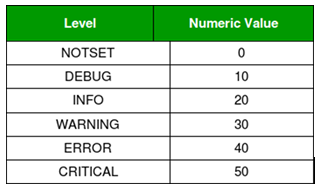

In [1]:
import logging

# Set up logging level

logging.basicConfig(level=logging.DEBUG)
#logging.basicConfig(level=logging.WARNING)

# Logging messages with different severity levels
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an info message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [1]:
import logging

# Set up logging to a file
logging.basicConfig(filename='first.log', level=logging.DEBUG)

logging.debug('Debug message written to file')
logging.info('Info message written to file')

##### asctime is "ASCII time." It refers to a string
representation of the date and time in a human-readable
format, typically including the year, month, day, hour,
minute, and second. This format is used in logging
to easily convey when a particular log entry was created.

In [3]:
# Set up logging to a file
import logging
logging.basicConfig(filename='second.log',format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

logging.debug('Debug message written to file')
logging.warning('Warning message written to file')
logging.error('Error message written to file')

#### Exception handling Logging

In [1]:
import logging

logging.basicConfig(filename="exception.log",level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

try:
    f=open("special.txt","r")  #  this file does not exist
except Exception as e:
    logging.exception(e)

In [ ]:
import logging

# Create a custom logger, it can have any name
logger = logging.getLogger('dbda_logger')
logger.setLevel(logging.DEBUG)

# Create handlers
console_handler = logging.StreamHandler()
file_handler = logging.FileHandler('main.log')

# Set level for handlers
console_handler.setLevel(logging.WARNING)
file_handler.setLevel(logging.DEBUG)

# Create a formatter and set it for the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

# Add handlers to the logger
logger.addHandler(console_handler)
logger.addHandler(file_handler)

# Log messages
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')